## Introducción
* En este análisis busca desarrollar estrategias efectivas para medir riesgos y así determinar precios para los seguros de automóviles. 
* Se busca obtener precios rentables y competitivos, que se basarán en la incidencia de delitos relacionados con automóviles.

## Relevancia de la estrategia
* Es importante tener un análisis de estos datos, puesto que es fundamental para la aseguradora poder elegir precios adecuados para los clientes y no tener perdidas de capital para el negocio.
* ¿Por qué?
Las zonas con altos índices de robos de vehículos o autopartes incrementan el riesgo de pérdida para las aseguradoras, lo que a menudo resulta en primas más altas para los propietarios de automóviles en esas áreas.


In [ ]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Filtrar las advertencias
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=Warning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [64]:
import pyodbc
import pandas as pd

# Configurar conexión usando autenticación de Windows
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=Ruby;'
    'DATABASE=Delitos;'
    'Trusted_Connection=yes;'
)
# Leer los datos en un DataFrame
df = pd.read_sql('SELECT * FROM Delito_M', conn)

# Cerrar la conexión
conn.close()

# Mostrar las primeras filas del DataFrame
print(df.head())

    Año  Clave_Ent         Entidad  Cve_Municipio       Municipio  \
0  2015          1  Aguascalientes           1001  Aguascalientes   
1  2015          1  Aguascalientes           1001  Aguascalientes   
2  2015          1  Aguascalientes           1001  Aguascalientes   
3  2015          1  Aguascalientes           1001  Aguascalientes   
4  2015          1  Aguascalientes           1001  Aguascalientes   

             Bien_jurídico_afectado Tipo_de_delito  Subtipo_de_delito  \
0  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
1  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
2  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
3  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
4  La vida y la Integridad corporal      Homicidio  Homicidio culposo   

           Modalidad  Enero  ...  Marzo  Abril  Mayo  Junio  Julio  Agosto  \
0  Con arma de fuego      2  ...      1      1     0      1      1  

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df.sample(5)

,Año,Clave_Ent,Entidad,Cve_Municipio,Municipio,Bien_jurídico_afectado,Tipo_de_delito,Subtipo_de_delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
610340,2017,31,Yucatán,31064,Sanahcat,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,0,...,0,0,0,0,0,0,0,0,0,0
569331,2017,26,Sonora,26054,San Javier,El patrimonio,Robo,Robo a transportista,Con violencia,0,...,0,0,0,0,0,0,0,0,0,0
156063,2015,30,Veracruz de Ignacio de la Llave,30040,Coatzintla,El patrimonio,Robo,Robo de autopartes,Con violencia,0,...,0,0,0,0,0,0,0,0,0,0
98064,2015,20,Oaxaca,20002,Acatlán de Pérez Figueroa,El patrimonio,Robo,Robo a negocio,Sin violencia,0,...,0,0,0,0,0,0,0,0,1,0
745411,2018,20,Oaxaca,20274,San Miguel Piedras,La vida y la Integridad corporal,Otros delitos que atentan contra la vida y la ...,Otros delitos que atentan contra la vida y la ...,Otros delitos que atentan contra la vida y la ...,0,...,0,0,0,0,0,0,0,0,0,0


## Limpieza de Datos
* Hacemos la verificación en los datos, de tipo, valores únicos y si hay valores nulos.
* Para propósitos de este análisis no es necesario eliminar columnas ni buscar una correlación en los datos. 


In [4]:
# Verificamos tipo de datos
df.dtypes

Año                        int64
Clave_Ent                  int64
Entidad                   object
Cve_Municipio              int64
Municipio                 object
Bien_jurídico_afectado    object
Tipo_de_delito            object
Subtipo_de_delito         object
Modalidad                 object
Enero                      int64
Febrero                    int64
Marzo                      int64
Abril                      int64
Mayo                       int64
Junio                      int64
Julio                      int64
Agosto                     int64
Septiembre                 int64
Octubre                    int64
Noviembre                  int64
Diciembre                  int64
dtype: object

In [5]:
# Comprobamos si hay valores nulos
missing_values_count = df.isnull().sum()

print('Columnas que tienen valores nulos')
print('----------------------------------')

missing_values_count

Columnas que tienen valores nulos
----------------------------------


Año                       0
Clave_Ent                 0
Entidad                   0
Cve_Municipio             0
Municipio                 0
Bien_jurídico_afectado    0
Tipo_de_delito            0
Subtipo_de_delito         0
Modalidad                 0
Enero                     0
Febrero                   0
Marzo                     0
Abril                     0
Mayo                      0
Junio                     0
Julio                     0
Agosto                    0
Septiembre                0
Octubre                   0
Noviembre                 0
Diciembre                 0
dtype: int64

In [6]:
# Verificamos los valores únicos
df.nunique().sort_values()

Año                          7
Bien_jurídico_afectado       7
Clave_Ent                   32
Entidad                     32
Tipo_de_delito              40
Subtipo_de_delito           55
Modalidad                   59
Enero                      409
Febrero                    418
Diciembre                  424
Noviembre                  432
Abril                      437
Septiembre                 445
Marzo                      446
Junio                      446
Julio                      446
Agosto                     456
Mayo                       458
Octubre                    459
Municipio                 2331
Cve_Municipio             2478
dtype: int64

## Transformación de datos
* Para hacer un análisis completo, necesitamos obtener el total de delitos cometidos y juntar los meses en una sola columna.
* Por tanto, se procede a hacer esa unión de columnas con melt, y así obtener estas dos nuevas columnas que facilitan el análisis de delitos.


In [7]:
# Unimos los meses en la variable Mes y la suma de los delitos del mes
df_melted = pd.melt(df, id_vars=['Año', 'Clave_Ent', 'Entidad', 'Cve_Municipio', 'Municipio', 'Bien_jurídico_afectado', 'Tipo_de_delito', 'Subtipo_de_delito', 'Modalidad'],
                     value_vars=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 
                                 'Junio', 'Julio', 'Agosto', 'Septiembre', 
                                 'Octubre', 'Noviembre', 'Diciembre'],
                     var_name='Mes', value_name='Total_Delitos')

# Asignamos el número de mes a su respectivo nombre
mes_map = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4,
    'Mayo': 5, 'Junio': 6, 'Julio': 7, 'Agosto': 8,
    'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}

df_melted['Mes_Num'] = df_melted['Mes'].map(mes_map)


# Verificar el nuevo DataFrame
print(df_melted.head())

    Año  Clave_Ent         Entidad  Cve_Municipio       Municipio  \
0  2015          1  Aguascalientes           1001  Aguascalientes   
1  2015          1  Aguascalientes           1001  Aguascalientes   
2  2015          1  Aguascalientes           1001  Aguascalientes   
3  2015          1  Aguascalientes           1001  Aguascalientes   
4  2015          1  Aguascalientes           1001  Aguascalientes   

             Bien_jurídico_afectado Tipo_de_delito  Subtipo_de_delito  \
0  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
1  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
2  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
3  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
4  La vida y la Integridad corporal      Homicidio  Homicidio culposo   

           Modalidad    Mes  Total_Delitos  Mes_Num  
0  Con arma de fuego  Enero              2        1  
1    Con arma blanca  Enero           

In [8]:
df_melted.head(5)

,Año,Clave_Ent,Entidad,Cve_Municipio,Municipio,Bien_jurídico_afectado,Tipo_de_delito,Subtipo_de_delito,Modalidad,Mes,Total_Delitos,Mes_Num
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Enero,2,1
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Enero,1,1
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Enero,0,1
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Enero,1,1
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Enero,0,1


In [9]:
df_auto = df_melted[df_melted['Subtipo_de_delito'].str.contains('auto', case=False, na=False)]

In [10]:
df_auto.groupby('Subtipo_de_delito')["Total_Delitos"].sum().reset_index()

,Subtipo_de_delito,Total_Delitos
0,Robo de autopartes,111417
1,Robo de vehículo automotor,1234481


In [11]:
df_auto.groupby(['Año'])["Total_Delitos"].sum().reset_index()

,Año,Total_Delitos
0,2015,171040
1,2016,183849
2,2017,226473
3,2018,232081
4,2019,207924
5,2020,163543
6,2021,160988


## Análisis con Serie de Tiempo


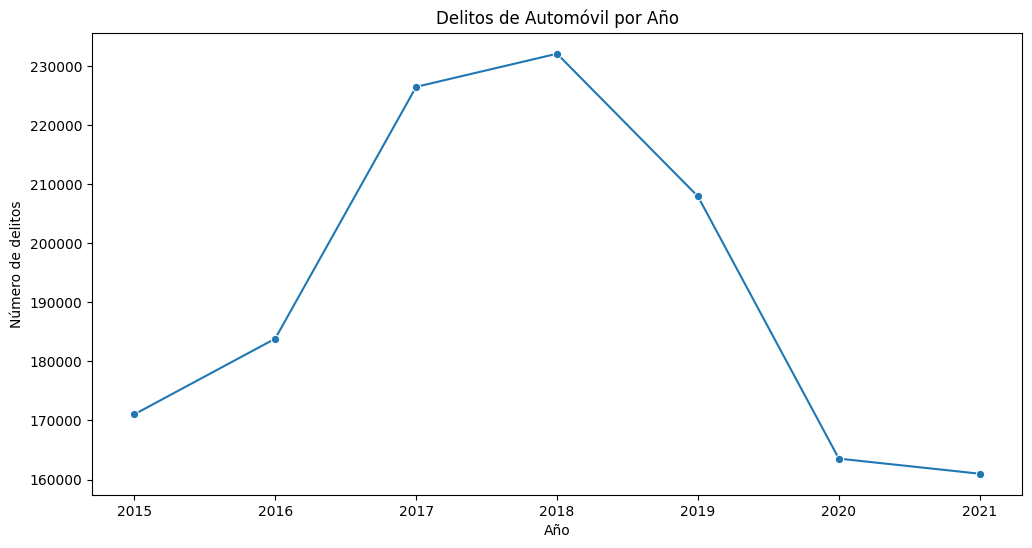

In [12]:
# Delitos de Automóvil por Año
df_municipio_delitos_año = df_auto.groupby(['Año'])["Total_Delitos"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x = 'Año', y = 'Total_Delitos', data=df_municipio_delitos_año, marker = "o")
plt.title('Delitos de Automóvil por Año')
plt.xlabel('Año')
plt.ylabel('Número de delitos')
plt.show()

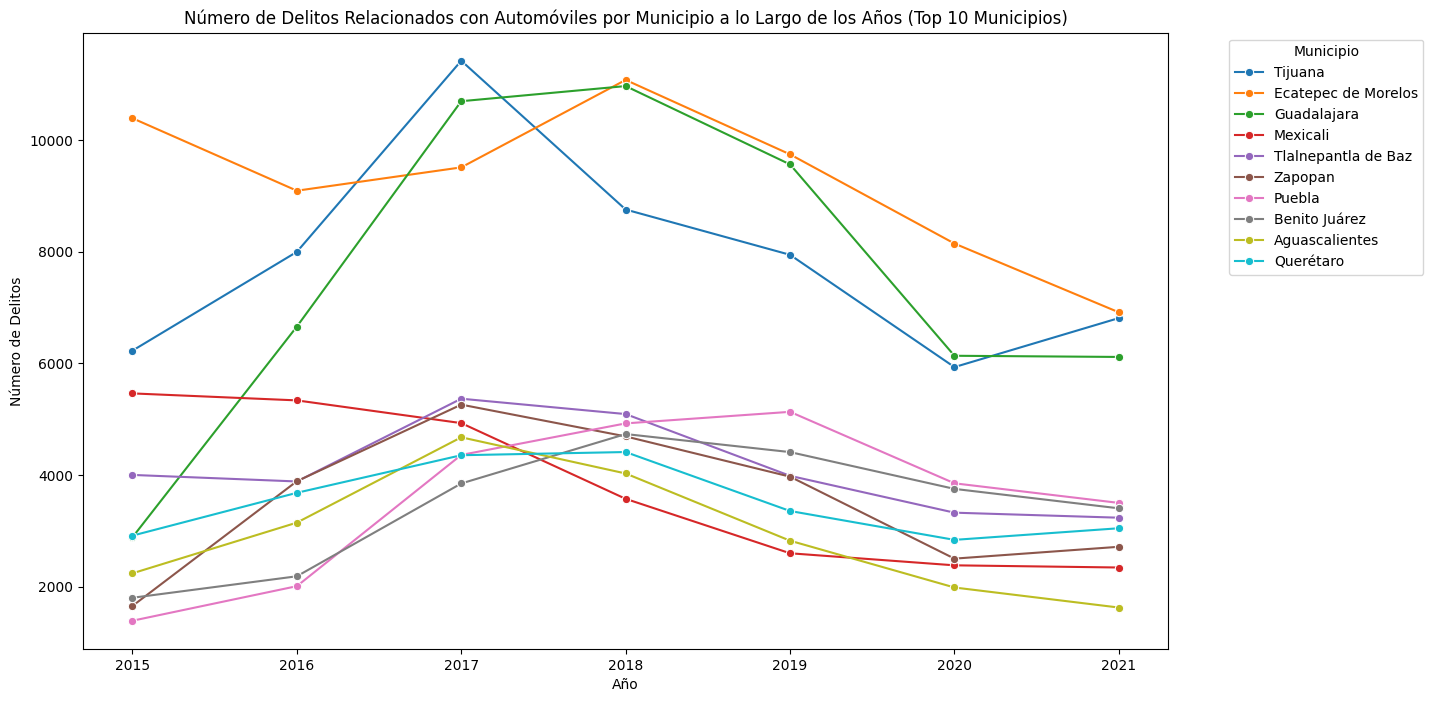

In [13]:
# Número de Delitos Relacionados con Automóviles por Municipio a lo Largo de los Años
total_delitos_por_municipio = df_auto.groupby('Municipio')['Total_Delitos'].sum().reset_index()

# Obtener las 10 entidades con más delitos
top_10_municipios = total_delitos_por_municipio.nlargest(10, 'Total_Delitos')['Municipio']

# Filtrar el DataFrame original para incluir solo estas 10 entidades
df_top_10_auto_m = df_auto[df_auto['Municipio'].isin(top_10_municipios)]

# Agrupar por entidad y año para obtener la suma de delitos por entidad en cada año
df_municipio_delitos_año = df_top_10_auto_m.groupby(['Municipio', 'Año'])['Total_Delitos'].sum().reset_index().sort_values(by='Total_Delitos', ascending=False)

# Crear el gráfico
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_municipio_delitos_año, x='Año', y='Total_Delitos', hue='Municipio', marker="o", palette='tab10', legend='full')
plt.title('Número de Delitos Relacionados con Automóviles por Municipio a lo Largo de los Años (Top 10 Municipios)')
plt.xlabel('Año')
plt.ylabel('Número de Delitos')
plt.legend(title='Municipio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_municipio_delitos_año['Año'].unique())
plt.show()

## Objetivo
* Identificar patrones y tendencias en los delitos de 2015 a 2021 y predecir los delitos en 2022.
* Selección de Municipio: Guadalajara.
* Se selecciona este municipio, porqué, como se observa en la gráfica, es el municipio con mayor incremento en delitos relacionados con automóviles a lo largo de los años.

In [14]:
df_municipio = df_auto[df_auto['Municipio'] == 'Guadalajara']

In [15]:
# Municipio = Guadalajara
df_municipio.sample(5)

,Año,Clave_Ent,Entidad,Cve_Municipio,Municipio,Bien_jurídico_afectado,Tipo_de_delito,Subtipo_de_delito,Modalidad,Mes,Total_Delitos,Mes_Num
14361059,2015,14,Jalisco,14039,Guadalajara,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,Octubre,59,10
14119102,2021,14,Jalisco,14039,Guadalajara,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Sin v...,Septiembre,0,9
3234831,2015,14,Jalisco,14039,Guadalajara,El patrimonio,Robo,Robo de autopartes,Con violencia,Marzo,1,3
2508155,2019,14,Jalisco,14039,Guadalajara,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,Febrero,249,2
18402777,2019,14,Jalisco,14039,Guadalajara,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,Diciembre,14,12


In [ ]:
# Elimino las columnas que no me sirven para el análisis
df_municipio.drop('Clave_Ent', axis=1, inplace=True)
df_municipio.drop('Entidad', axis=1, inplace=True)
df_municipio.drop('Cve_Municipio', axis=1, inplace=True)
df_municipio.drop('Municipio', axis=1, inplace=True)
df_municipio.drop('Mes_Num', axis=1, inplace=True)

In [17]:
df_municipio_años = df_municipio.groupby('Año')['Total_Delitos'].sum().reset_index()
df_municipio_años

,Año,Total_Delitos
0,2015,2887
1,2016,6660
2,2017,10696
3,2018,10967
4,2019,9564
5,2020,6137
6,2021,6116


* El municipio es importante para analizar porque desde 2020 a 2021 no hubo una tendencia muy alta o muy baja de delitos, entonces se hace importante la necesidad a predecir si  irá en aumento o se reducen los delitos para el 2022.

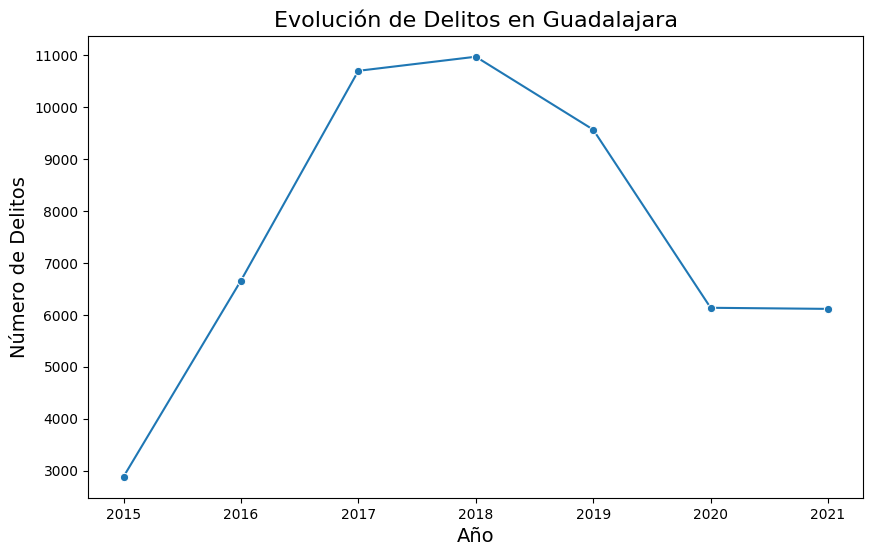

In [18]:
# Crear la gráfica de línea
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_municipio_años, x='Año', y='Total_Delitos', marker='o')
plt.title('Evolución de Delitos en Guadalajara', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Delitos', fontsize=14)
plt.show()

* Para hacer una predicción del año 2022 en el número de delitos, primero tenemos que analizar la tendencia que llevo el número de delitos a lo largo del tiempo. 


In [19]:
# Calcula estadísticas descriptivas como la media, mediana y desviación estándar de los delitos por año.
media_anual = df_municipio_años['Total_Delitos'].mean()
mediana_anual = df_municipio_años['Total_Delitos'].median()
desviacion_estandar_anual = df_municipio_años['Total_Delitos'].std()

print(f"Media anual de delitos: {media_anual:.2f}")
print(f"Mediana anual de delitos: {mediana_anual:.2f}")
print(f"Desviación estándar anual de delitos: {desviacion_estandar_anual:.2f}")

Media anual de delitos: 7575.29
Mediana anual de delitos: 6660.00
Desviación estándar anual de delitos: 2949.96


## Serie de tiempo

In [20]:
from sklearn.model_selection import train_test_split

# Convertir el df anual en una serie de tiempo
df_municipio_años.set_index('Año', inplace=True)

# Dividir en conjuntos de entrenamiento y prueba
train = df_municipio_años[df_municipio_años.index < 2022]
test = df_municipio_años[df_municipio_años.index >= 2022]

* Elijo el modelo ARIMA porque funciona muy bien en predicciones a corto plazo. También porque se pueden ajustar los parametros de la autoregresión, promedio movil y diferenciacion para poder adaptarlo a mi serie de tiempo.

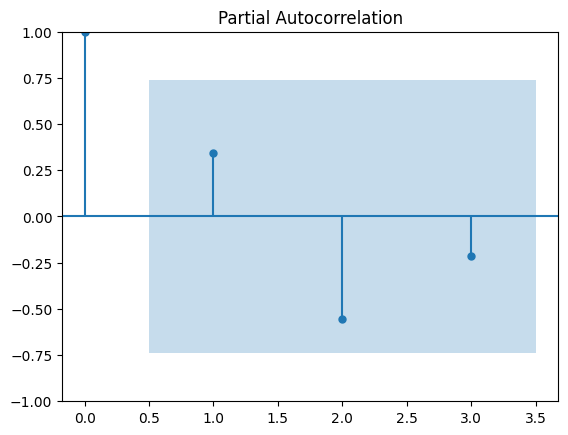

In [21]:
#p
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Ajustar el modelo AR
plot_pacf(df_municipio_años['Total_Delitos'], lags=3)
plt.show()

In [22]:
#d
from statsmodels.tsa.stattools import adfuller

#Dickey-Fuller aumentado para comprobar estacionariedad
result = adfuller(df_municipio_años['Total_Delitos'])
print(f'p-value: {result[1]}')

p-value: 0.0058290537023741595


In [23]:
# Diferenciar la serie
df_municipio_años['Total_Delitos_Diff'] = df_municipio_años['Total_Delitos'].diff()

# Ver los primeros valores diferenciados
print(df_municipio_años[['Total_Delitos', 'Total_Delitos_Diff']].head())

      Total_Delitos  Total_Delitos_Diff
Año                                    
2015           2887                 NaN
2016           6660              3773.0
2017          10696              4036.0
2018          10967               271.0
2019           9564             -1403.0


In [24]:
# Test de Dickey-Fuller en la serie diferenciada
result = adfuller(df_municipio_años['Total_Delitos_Diff'].dropna())
print(f'p-value: {result[1]}')
# Si el p-valor esta por debajo de 0.05, la serie diferenciada es estacionaria.

p-value: 0.641450967984335


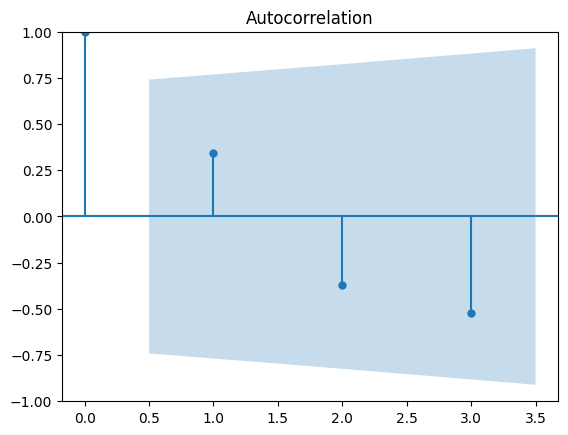

In [25]:
#q
plot_acf(df_municipio_años['Total_Delitos'], lags=3)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Modelo ARIMA
model = ARIMA(train['Total_Delitos'], order=(2, 1, 1))  #Parámetros (p, d, q)
model_fit = model.fit()

# Hacer predicciones
forecast = model_fit.forecast(steps=2)  # Predecir 1 año (2022)

In [27]:
# Sacamos la predicción de delitos para el año 2022
prediccion_2022 = forecast.values[0]
print(f"Predicción del total de delitos para el año 2022: {prediccion_2022:.2f}")

Predicción del total de delitos para el año 2022: 8094.14


In [28]:
df_municipio_años

,Total_Delitos,Total_Delitos_Diff
Año,,
2015,2887,NaN
2016,6660,3773.0
2017,10696,4036.0
2018,10967,271.0
2019,9564,-1403.0
2020,6137,-3427.0
2021,6116,-21.0


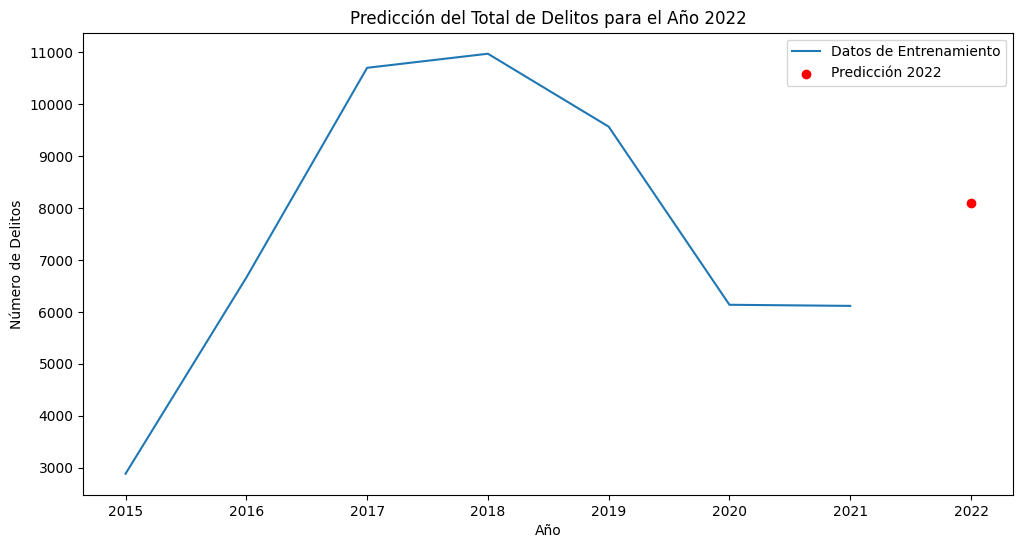

In [29]:
# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Total_Delitos'], label='Datos de Entrenamiento')
plt.scatter(2022, prediccion_2022, color='red', label='Predicción 2022', zorder=5)
plt.title('Predicción del Total de Delitos para el Año 2022')
plt.xlabel('Año')
plt.ylabel('Número de Delitos')
plt.legend()
plt.show()

* En este caso indicando un incremento en el número de delitos para el año 2022.

In [49]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Se divide entrenamiento y prueba
train_prueba = train[train.index < 2021]
test_prueba = train[train.index >= 2021]

model = ARIMA(train_prueba['Total_Delitos'], order=(2, 1, 1))
model_fit = model.fit()

# Se hace la predicción
forecast = model_fit.predict(start=test_prueba.index[0], end=test_prueba.index[-1])

# Calcular las métricas de error
mae = mean_absolute_error(test_prueba['Total_Delitos'], forecast)
mse = mean_squared_error(test_prueba['Total_Delitos'], forecast)
rmse = np.sqrt(mse)

# Mostrar los resultados
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 1268.72
Mean Squared Error (MSE): 1609647.50
Root Mean Squared Error (RMSE): 1268.72


* El error absoluto nos da 1268.72, lo cual es una precisión decente. 

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Clasificación de estados por peligrosidad (Clustering)
* Objetivo: Clasificar los estados según su peligrosidad en 2021.


In [50]:
df_anio = df_auto[df_auto['Año'] == 2021]

In [51]:
# Agrupamos por estado y el total de delitos en el año 2021
df_estado = df_anio.groupby('Entidad')['Total_Delitos'].sum().sort_values(ascending=False).reset_index()
df_estado

,Entidad,Total_Delitos
0,México,39693
1,Ciudad de México,15616
2,Jalisco,14721
3,Baja California,11511
4,Puebla,9102
5,Veracruz de Ignacio de la Llave,6075
6,Michoacán de Ocampo,5603
7,Morelos,5242
8,Chihuahua,4705
9,San Luis Potosí,4571


In [52]:
# Genera una copia del nuevo df
df2 = df_estado.copy()

In [53]:
# Se selecciona las columnas de tipo numérico
cols_num = df2.columns[[np.issubdtype(dt, np.number) for dt in df2.dtypes]]

<Axes: xlabel='Total_Delitos', ylabel='Count'>

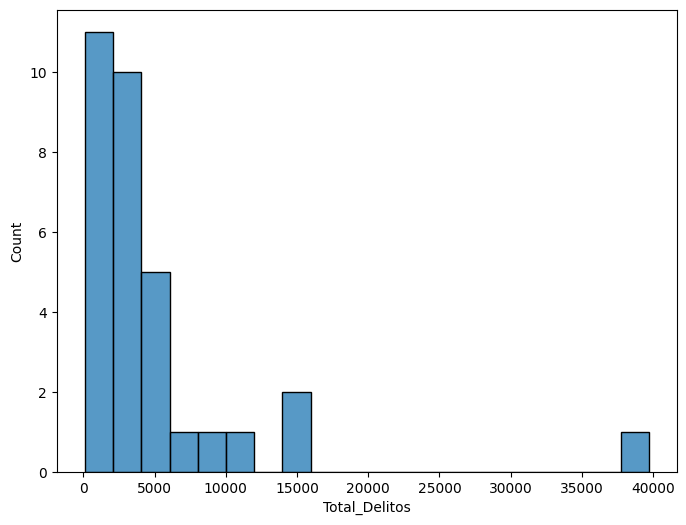

In [54]:
plt.figure(figsize=(8, 6))
sns.histplot(df2['Total_Delitos'], kde=False)

* En el siguiente histograma que muestra la distribución del total de delitos, tiene un importante sesgo a la izquierda y unos cuantos outliers que indican demasiados delitos.


## Normalización

In [55]:
from sklearn.preprocessing import StandardScaler

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Normalizar la columna Total Delitos
df2['Total Delitos Normalizado'] = scaler.fit_transform(df2[['Total_Delitos']])

* Se ajustan los valores de Total Delitos a rango mucho más reducido. 

<Axes: xlabel='Total Delitos Normalizado', ylabel='Count'>

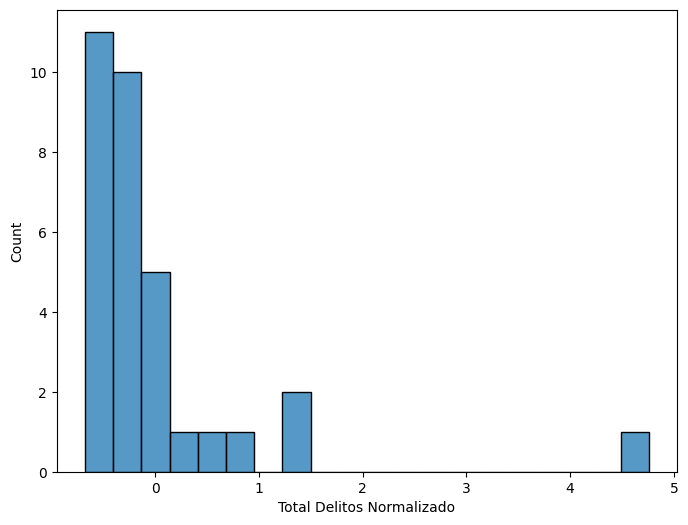

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(df2['Total Delitos Normalizado'], kde=False)

* La forma de la distribución es igual a la original, sin embargo, esta normalización ha permitido que los datos de Total Delitos sean más fáciles de comparar al reducir las grandes diferencias en las magnitudes de los valores.

In [57]:
df2

,Entidad,Total_Delitos,Total Delitos Normalizado
0,México,39693,4.757130
1,Ciudad de México,15616,1.452733
2,Jalisco,14721,1.329901
3,Baja California,11511,0.889351
4,Puebla,9102,0.558733
5,Veracruz de Ignacio de la Llave,6075,0.143299
6,Michoacán de Ocampo,5603,0.078520
7,Morelos,5242,0.028975
8,Chihuahua,4705,-0.044724
9,San Luis Potosí,4571,-0.063115


## Algoritmo K-Means y Método Silhouette
* Buscamos determinar el número optimo de clusters para agrupar los datos del Total Delitos Normalizado, el resultado de usar el algoritmo de K-Means es el gráfico elbow, en el cuál elige el valor adecuado de k que indica el punto donde agregar más clusters no reduce la distorsión.


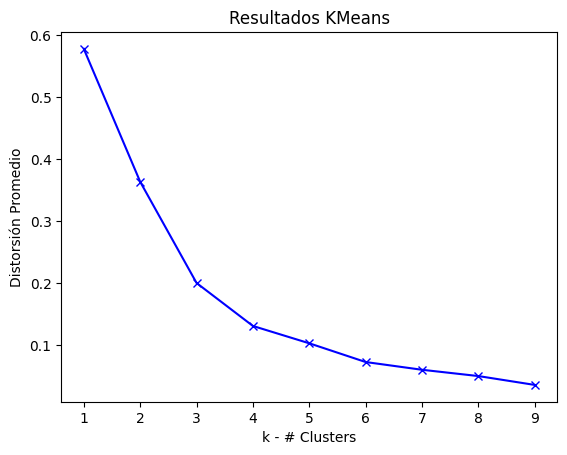

In [58]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Rango de clusters que vamos a probar
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df2[['Total Delitos Normalizado']])
    prediction = model.predict(df2[['Total Delitos Normalizado']])
    
    # Calcular la distorsión promedio
    meanDistortions.append(sum(np.min(cdist(df2[['Total Delitos Normalizado']], model.cluster_centers_, 'euclidean'), axis=1)) / df2['Total Delitos Normalizado'].shape[0])

# Graficar los resultados
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k - # Clusters')
plt.ylabel('Distorsión Promedio')
plt.title('Resultados KMeans')
plt.show()

In [59]:
# Silhouette Score
from sklearn.metrics import silhouette_score
# Genera un dataframe para el resultado
sil_df = pd.DataFrame({}, columns=['Model', 'n_clusters', 'score'], index=None)

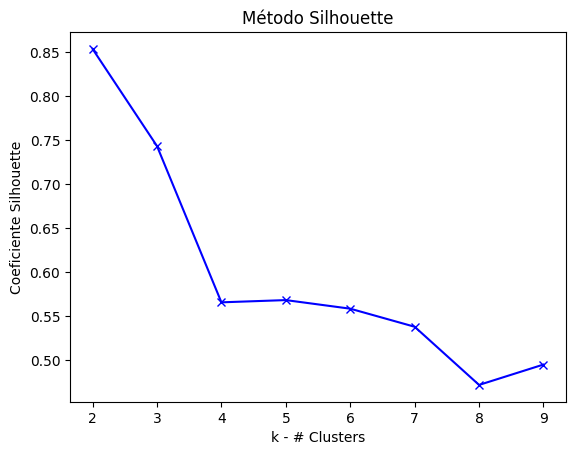

In [60]:
# Calcular el coeficiente de silhouette para diferentes números de clusters
silhouette_scores = []
clusters = range(2, 10)
for k in clusters:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df2[['Total Delitos Normalizado']])
    labels = model.predict(df2[['Total Delitos Normalizado']])
    score = silhouette_score(df2[['Total Delitos Normalizado']], labels)
    silhouette_scores.append(score)

# Graficar los resultados
plt.plot(clusters, silhouette_scores, 'bx-')
plt.xlabel('k - # Clusters')
plt.ylabel('Coeficiente Silhouette')
plt.title('Método Silhouette')
plt.show()

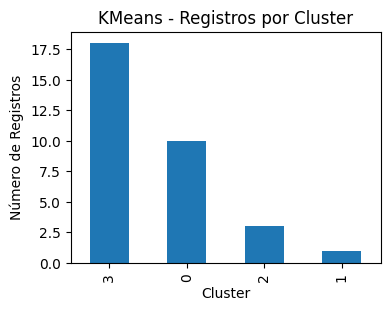

In [61]:
model = KMeans(n_clusters=4, random_state=42)
df2['Cluster'] = model.fit_predict(df2[['Total Delitos Normalizado']])


fig, ax = plt.subplots(1,1, figsize=(4,3))
pd.value_counts(df2['Cluster']).plot(kind='bar').set_title('KMeans - Registros por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Registros')
plt.show()

* Aquí se muestra el número de Clusters elegidos (4). Se elige esta cantidad de Clusters porque se entiende bien el análisis de la agrupación.


In [62]:
df2

,Entidad,Total_Delitos,Total Delitos Normalizado,Cluster
0,México,39693,4.757130,1
1,Ciudad de México,15616,1.452733,2
2,Jalisco,14721,1.329901,2
3,Baja California,11511,0.889351,2
4,Puebla,9102,0.558733,0
5,Veracruz de Ignacio de la Llave,6075,0.143299,0
6,Michoacán de Ocampo,5603,0.078520,0
7,Morelos,5242,0.028975,0
8,Chihuahua,4705,-0.044724,0
9,San Luis Potosí,4571,-0.063115,0


* En el cluster 1 se encuentra un único dato, el cual es “México” el cuál es el outlier con una gran cantidad de delitos, justificando su inclusión en un cluster propio.
* En el cluster 2 se encuentran 3 datos los cuales también son parte de los valores altos, pero sin llegar al nivel de delincuencia del cluster 1.
* En el cluster 0 se encuentra el grupo con un total de delitos más moderados sin llegar a extremos.
* El cluster 3 nos muestra los totales de delitos más bajos 


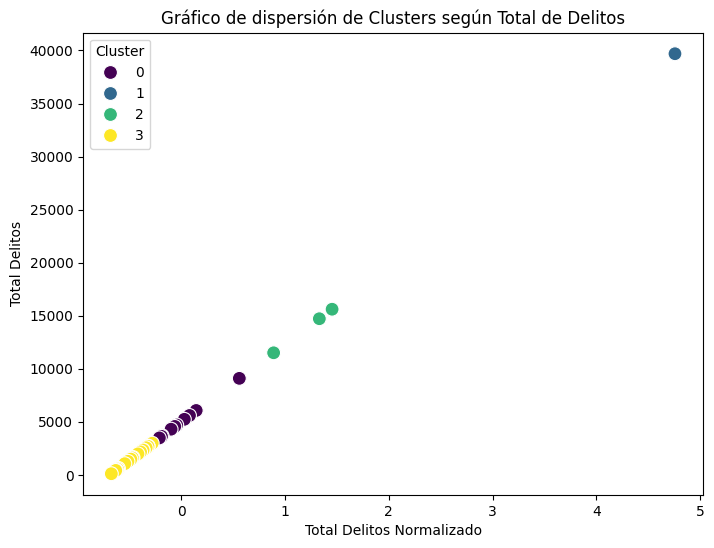

In [63]:
# Gráfico de dispersión
plt.figure(figsize=(8,6))
sns.scatterplot(data=df2, x='Total Delitos Normalizado', y='Total_Delitos', hue='Cluster', palette='viridis', s=100)

plt.title('Gráfico de dispersión de Clusters según Total de Delitos')
plt.xlabel('Total Delitos Normalizado')
plt.ylabel('Total Delitos')
plt.legend(title='Cluster')
plt.show()

## Interpretación de resultados
* Gracias a esta agrupación, podemos ajustar nuestras estrategias de precios y coberturas de forma precisa, basándonos en el riesgo real que presenta cada entidad. No solo se optimizan los costos operativos, sino que también, nos permite ofrecer un servicio más justo y adaptado a las necesidades y riesgos de cada estado.
* Estado más peligroso: México


## Conclusión
### Los descubrimientos que tenemos en este análisis son:
 * Entre 2015 y 2017, observamos un aumento significativo en el número de delitos. A partir de 2017 la tendencia cambia, con una disminución constante hasta estabilizarse entre 2020 y 2021.
 * El modelo ARIMA predice un incremento moderado para el año 2022, esto solo con los datos que disponemos, puede haber otras variables como asuntos económicos o sociales que puedan cambiar la predicción.
 * México se destaca por tener un nivel extremadamente alto de delitos, muy por encima del resto del país. Esto indica que en esta región debemos aumentar la tarifa, ya que el riesgo para los vehículos es mayor.
 * Ciudad de México, Jalisco y Baja California tienen también niveles de criminalidad altos sin ser tan extremos como el estado de México. Se recomienda un enfoque de tarifas ajustadas con coberturas que incluyan protección contra robo y daño asociados, pero manteniendo una flexibilidad en la oferta.
 * Lo que encontramos en el Cluster 0, son entidades con criminalidad moderada, para estas zonas se puede mantener unas tarifas más estándar, aunque con atención a ciertas áreas que pueden requerir ajustes específicos si los datos locales lo justifican.
 * En el Cluster 3 encontramos los estados con delitos más bajos, lo que significa que el riesgo es menor, en estos estados podemos ofrecer tarifas más competitivas, lo que permite atraer más clientes y al mismo tiempo mantener la sostenibilidad de nuestros servicios debió al menor riesgo.


## Mejoras en el Análisis
* Se requiere incorporación de variables adicionales como, factores socioeconómicos (tasa de desempleo, ingreso promedio, educación), tiempo y mapas de calor geoespaciales.
* Análisis en tiempo real.
Establecer un sistema de monitoreo y ajuste de los modelos predictivos en intervalos regulares para reflejar cambios en las tendencias.
* Evaluación  de impacto de políticas públicas, como el aumento de patrullaje o instalación de cámaras de seguridad afectan las tasas de criminalidad.
* Trabajar junto con equipos de marketing y ventas para evaluar cómo las predicciones de criminalidad impactan en las decisiones de los clientes y ajustar las estrategias de seguro en consecuencia


## Enlace y Capturas de Pantalla del Tablero de Google Data Studio
* Es importante tener una herramienta de visualización de datos en la empresa, porqué nos ayudan a organizar y crear gráficas vistosas, interactivas y que cuentan una historia. Esto ayuda a los que no entienden muy bien las gráficas o buscan información breve y concisa, puedan tomar desiciones.
* https://lookerstudio.google.com/reporting/49879106-b41f-4e2b-8685-31c58a9f57e9
